# Example Notebook explaining the base station Class 

This notebook will explain the attributes and methods of the base station class which all of the specialised weather station classes inherit from. 

In particular it gives detail on how to create a station class given a `station_id`, how to retrieve all of the latest measurements from the station, plotting data, accessing station metadata such as latitude, longitude and flood status 

To begin we must import `station` from our `flood_monitoring` package 

 Installing through github. 

In [ ]:
!pip install git+https://github.com/niv-en/flood-monitoring

In [2]:
from flood_monitoring import station

Initialiising a station type with a valid `station_id` 

In [36]:
test_station = station('F1906') 

## Accessing `station` attributes 

We can print all of the stations attributes using the `var` function 

In [4]:
vars(test_station)

{'station_id': 'F1906',
 'parameter': '',
 'qualifier': None,
 '_station__lat': 54.080705,
 '_station__long': -2.024779,
 '_station__in_flood': False,
 'measures': [{'qualifier': 'Stage',
   'units': 'm',
   'value_type': 'instantaneous',
   'notation': 'F1906-level-stage-i-15_min-m'},
  {'qualifier': 'Logged',
   'units': 'm3/s',
   'value_type': 'instantaneous',
   'notation': 'F1906-flow-logged-i-15_min-m3_s'}],
 'data': [0.237, None],
 'timestamps': ['2025-05-19T16:45:00Z', None]}

###  `station_id` 

 Unique reference which is used to identify each station

###  `parameter`

 Used in conjustion with `qualifier` to define which type of measure station we want, given that `station` is the base class we can see that both are blank 

###  `_station__lat`  , `_station__long` 

display the longitude and latiduate and can be accessed by calling either `station.latitude`, `station.longitude` but have no setter method hence cannot be altered 

In [40]:
test_station.latitude, test_station.longitude 

(54.080705, -2.024779)

Attempting to set both the latitude and longitude 

In [43]:
#attempting to manually set the latitude 
try:
    test_station.latitude = 2
except AttributeError:
    print('cant set the latitude') 

#attemtping to manually set the longitude 

try:
    test_station.longitude = 123

except AttributeError:
    print('cant set the longitude')


cant set the latitude
cant set the longitude


### `_station_in_flood` 

in a similar vain to both latitude and longitude, the stations in flood status can be accesed through `station.in_flood` but cannot be modified manually 

In [44]:
test_station.in_flood

False

In [46]:
try:
    test_station.in_flood = False 


except AttributeError:

    print('cant set the in_flood status')

cant set the in_flood status


### `measures` 

meausres stores a list of dictionaries each of which describe a particular measure 

### `data` 

data stores the value of the most recent measurement, for each of the stations measurements 

### `timestamps` 

`timestamps` stores the timestamp of the most recent measurement which is stored in `data` , the order of these values are alligned with both `data` and `measures` 

Given that `measures`, `data` and `timestamps` are all aligned it is easy to zip them together like so 

In [49]:
for measure, time, value in zip(test_station.measures, test_station.timestamps, test_station.data):

    print(f'measure : {measure}, time : {time}, value : {value }')

measure : {'qualifier': 'Stage', 'units': 'm', 'value_type': 'instantaneous', 'notation': 'F1906-level-stage-i-15_min-m'}, time : 2025-05-19T17:00:00Z, value : 0.237
measure : {'qualifier': 'Logged', 'units': 'm3/s', 'value_type': 'instantaneous', 'notation': 'F1906-flow-logged-i-15_min-m3_s'}, time : None, value : None


## Using `stations` methods

###  `get_latest_measurement()` 

Get latest measurement will retrieve all the latest measurement for all measures stored inside of `station.measures` 

In [55]:
test_station = station('F1906')

In [57]:
test_station.get_latest_measurement() 

{'Stage': 0.237, 'Logged': None}

Here we can see it prints the measures notation as well its most recent value, and that the latest reading is not available for the flow measurement 

### `plot_data` 

`plot_data`  draws from the `measures`, `timestamps`, `values` attributes of our `station` object. So it essentially plots the values for each of the stations measures at the time of its initialisation 

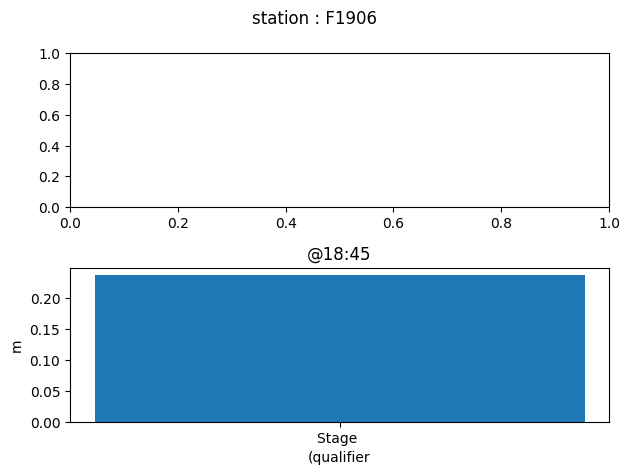

In [58]:
fig, ax = test_station.plot_data() 

This needs some rejigging maybe use measure ID for everything because it is truly unique could be the move, need to sort out everything about teh upper wone still havinfed fied the issues,

potentially think about removing measures if they dont have  a most recenet measurement 

### `plot_data_range()`